In [1]:
import mlflow
from pycaret.classification import *
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
def resumetable(df):
    """
    Objective: For a given dataframe this function provides information
    regarding Missing and Unique values per column.

    Input: param df: Dataframe to check the information.

    Output: return summary: a dataframe with columns providing summary per column of the input dataframe.
    
    """
    df = df.copy()
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Missing Percentage'] = df.isnull().sum().values/len(df)
    summary['Uniques'] = df.nunique().values
    return summary
resumetable(df)

Dataset Shape: (891, 12)


,Name,dtypes,Missing,Missing Percentage,Uniques
0,PassengerId,int64,0,0.000000,891
1,Survived,int64,0,0.000000,2
2,Pclass,int64,0,0.000000,3
3,Name,object,0,0.000000,891
4,Sex,object,0,0.000000,2
5,Age,float64,177,0.198653,88
6,SibSp,int64,0,0.000000,7
7,Parch,int64,0,0.000000,7
8,Ticket,object,0,0.000000,681
9,Fare,float64,0,0.000000,248


In [4]:
Ticket = df['Ticket'].str.split(expand=True)
Ticket

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [7]:
#Ticket[Ticket[0]=='LINE']
df[df['Ticket']=='LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [10]:
for i in range(891):
    if Ticket.loc[i,2] != None:
        Ticket.loc[i,0] = Ticket.loc[i,0]+'_'+Ticket.loc[i,1]
        Ticket.loc[i,1] = Ticket.loc[i,2]
    if Ticket.loc[i,1] == None and Ticket.loc[i,0] != 'LINE':
        Ticket.loc[i,1] = Ticket.loc[i,0]
        Ticket.loc[i,0] = None
    else:
        Ticket.loc[i,0] == 0
        Ticket.loc[i,1] == 'LINE'
Ticket

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,None,113803,None
4,None,373450,None
...,...,...,...
886,None,211536,None
887,None,112053,None
888,W./C.,6607,None
889,None,111369,None


In [11]:
df.Ticket = Ticket[1]
df["codeTicket"] = Ticket[0]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,codeTicket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,21171,7.2500,NaN,S,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C85,C,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,3101282,7.9250,NaN,S,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,None
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,None
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,NaN,S,W./C.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,None


In [12]:
Last_Name = df["Name"].str.split(",",n=1,expand=True)
df["Last_Name"] = Last_Name[0]
df["Name"] = Last_Name[1]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,codeTicket,Last_Name
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,21171,7.2500,NaN,S,A/5,Braund
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,17599,71.2833,C85,C,PC,Cumings
2,3,1,3,Miss. Laina,female,26.0,0,0,3101282,7.9250,NaN,S,STON/O2.,Heikkinen
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,None,Futrelle
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S,None,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S,None,Montvila
887,888,1,1,Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S,None,Graham
888,889,0,3,"Miss. Catherine Helen ""Carrie""",female,NaN,1,2,6607,23.4500,NaN,S,W./C.,Johnston
889,890,1,1,Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C,None,Behr


In [13]:

resumetable(df)

Dataset Shape: (891, 14)


,Name,dtypes,Missing,Missing Percentage,Uniques
0,PassengerId,int64,0,0.000000,891
1,Survived,int64,0,0.000000,2
2,Pclass,int64,0,0.000000,3
3,Name,object,0,0.000000,803
4,Sex,object,0,0.000000,2
5,Age,float64,177,0.198653,88
6,SibSp,int64,0,0.000000,7
7,Parch,int64,0,0.000000,7
8,Ticket,object,4,0.004489,678
9,Fare,float64,0,0.000000,248


In [16]:
s = setup(df, target='Survived', log_experiment='mlflow', experiment_name='Titanic')

,Description,Value
0,session_id,457
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 14)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
melhor = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8203,0.8808,0.7248,0.7842,0.7493,0.6103,0.6150,0.0550
ridge,Ridge Classifier,0.8170,0.0000,0.7118,0.7901,0.7413,0.6013,0.6100,0.0150
lr,Logistic Regression,0.8154,0.8783,0.7116,0.7897,0.7394,0.5983,0.6086,0.2410
rf,Random Forest Classifier,0.8074,0.8645,0.7161,0.7641,0.7323,0.5833,0.5906,0.0530
dt,Decision Tree Classifier,0.8010,0.7787,0.6904,0.7563,0.7180,0.5656,0.5706,0.0150
ada,Ada Boost Classifier,0.7977,0.8559,0.6685,0.7700,0.7107,0.5570,0.5647,0.0340
lightgbm,Light Gradient Boosting Machine,0.7962,0.8553,0.6986,0.7423,0.7142,0.5571,0.5623,0.0210
et,Extra Trees Classifier,0.7944,0.8540,0.7241,0.7347,0.7241,0.5611,0.5659,0.0520
lda,Linear Discriminant Analysis,0.7720,0.7909,0.6772,0.7137,0.6882,0.5099,0.5163,0.0570
knn,K Neighbors Classifier,0.6937,0.7246,0.5306,0.6031,0.5619,0.3285,0.3317,0.1060


In [18]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8712,0.6957,0.8000,0.7442,0.6126,0.6161
1,0.7937,0.8531,0.6250,0.7895,0.6977,0.5442,0.5528
2,0.7937,0.8168,0.6667,0.7619,0.7111,0.5517,0.5547
3,0.8387,0.8974,0.7391,0.8095,0.7727,0.6481,0.6497
4,0.8226,0.9108,0.7826,0.7500,0.7660,0.6232,0.6236
5,0.8226,0.8657,0.7826,0.7500,0.7660,0.6232,0.6236
6,0.8710,0.9537,0.8261,0.8261,0.8261,0.7235,0.7235
7,0.7581,0.8980,0.7826,0.6429,0.7059,0.5037,0.5108
8,0.7903,0.8411,0.5652,0.8125,0.6667,0.5208,0.5391


In [20]:
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
tune_model(gbc)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.8723,0.6522,0.7895,0.7143,0.5734,0.5793
1,0.7937,0.8323,0.7083,0.7391,0.7234,0.5590,0.5593
2,0.8254,0.8323,0.7500,0.7826,0.7660,0.6268,0.6272
3,0.8065,0.8907,0.6957,0.7619,0.7273,0.5778,0.5792
4,0.7903,0.9142,0.7391,0.7083,0.7234,0.5547,0.5550
5,0.8226,0.8250,0.7826,0.7500,0.7660,0.6232,0.6236
6,0.8710,0.9197,0.8696,0.8000,0.8333,0.7284,0.7301
7,0.7581,0.8629,0.7826,0.6429,0.7059,0.5037,0.5108
8,0.8065,0.8623,0.6522,0.7895,0.7143,0.5699,0.5759


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=9,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=240,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=457, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [24]:
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

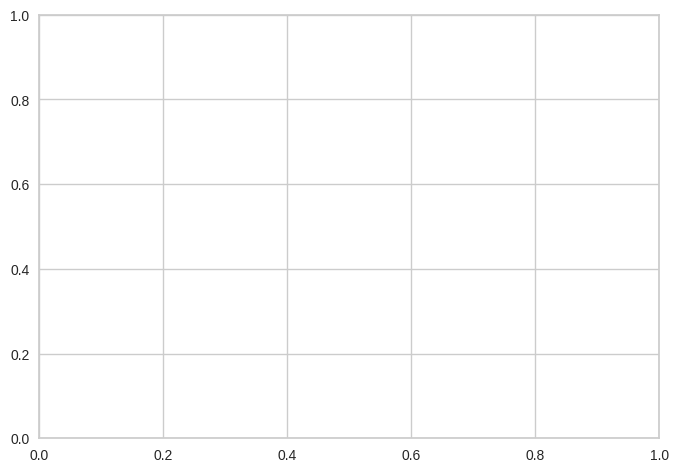

TypeError: This function only supports tree based models for binary classification: dt, rf, lightgbm, et.

In [25]:
interpret_model(gbc)

In [31]:
df2 = pd.read_csv('test.csv')
Ticket2 = df2['Ticket'].str.split(expand=True)
for j in range(417):
    if Ticket2.loc[j,2] != None:
        Ticket2.loc[j,0] = Ticket2.loc[j,0]+'_'+Ticket2.loc[j,1]
        Ticket2.loc[j,1] = Ticket2.loc[j,2]
    if Ticket2.loc[j,1] == None and Ticket2.loc[j,0] != 'LINE':
        Ticket2.loc[j,1] = Ticket2.loc[j,0]
        Ticket2.loc[j,0] = None
    else:
        Ticket2.loc[j,0] == 0
        Ticket2.loc[j,1] == 'LINE'
df2.Ticket = Ticket2[1]
df2["codeTicket"] = Ticket2[0]
Last_Name2 = df2["Name"].str.split(",",n=1,expand=True)
df2["Last_Name"] = Last_Name2[0]
df2["Name"] = Last_Name2[1]

In [32]:
predicao = predict_model(gbc,df2)
predicao

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,codeTicket,Last_Name,Label,Score
0,892,3,Mr. James,male,34.5,0,0,330911,7.8292,NaN,Q,None,Kelly,0,0.9186
1,893,3,Mrs. James (Ellen Needs),female,47.0,1,0,363272,7.0000,NaN,S,None,Wilkes,1,0.5591
2,894,2,Mr. Thomas Francis,male,62.0,0,0,240276,9.6875,NaN,Q,None,Myles,0,0.9062
3,895,3,Mr. Albert,male,27.0,0,0,315154,8.6625,NaN,S,None,Wirz,0,0.9251
4,896,3,Mrs. Alexander (Helga E Lindqvist),female,22.0,1,1,3101298,12.2875,NaN,S,None,Hirvonen,1,0.5192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr. Woolf,male,NaN,0,0,3236,8.0500,NaN,S,A.5.,Spector,0,0.9251
414,1306,1,Dona. Fermina,female,39.0,0,0,17758,108.9000,C105,C,PC,Oliva y Ocana,1,0.9219
415,1307,3,Mr. Simon Sivertsen,male,38.5,0,0,3101262,7.2500,NaN,S,SOTON/O.Q.,Saether,0,0.9251
416,1308,3,Mr. Frederick,male,NaN,0,0,359309,8.0500,NaN,S,None,Ware,0,0.9251


In [33]:
output = pd.DataFrame({'PassengerId': predicao.PassengerId,'Survived': predicao.Label})
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
output.to_csv('submission2.csv', index=False)